# Atividade Prática Redes Neurais Fashion

O objetivo desta prática é fazer com que vocês tenham um contato mínimo com Redes Neurais (numa perspectiva prática) e com um problema de classificação que exige um pouco mais de processamento. Além disso, desejo que vocês possam se atentar à formas de realizar plots (gráficos) mais interessantes para comparar resultados em projetos de classificação.

O Projeto está utilizando o conjunto de dados (dataset) chamado **MNIST**, que classifica dígitos manuscritos já digitalizados. O objetivo é acompanhar cada trecho do código. Vocês deverão:

1. Executar cada célula,
2. Ver os resultados, e então
3. Fazer a alteração do conjunto de dados para o **FASHION MINST**

Este dataset FASHION MINST, é um dataset de imagens de roupas e artigos de uso pessoal.

A prática se divide em seis (6) etapas: Exploração dos Dados, Aplicação de pré-processamento simples, Contrução do modelo, Treinamento, Avaliação do desempenho e, por fim, a realização de predições, ou seja, seu uso.

## Etapa 1 - Obtenção e Exploração dos Dados

In [ ]:
# carregando as bibliotecas essenciais

# from sklearn

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Outras bibliotecas auxiliares
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# carregando o data set MNIST
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


O comando anterior faz o download e carrega um conjunto de imagens que representam dígitos manuscritos. Uma descrição maior sobre o dataset pode ser obtida no seguinte endereço:

*   https://keras.io/api/datasets/mnist/
*   http://yann.lecun.com/exdb/mnist/

De forma resumida o dataset é composto de 60 mil imagens de treinamento e de 10 mil imagens de teste. Cada imagem possuí 28x28 pixels e são armazenadas em formato de matrizes de 28x28 linhas e colunas em escala de cinza.

Enquanto as variáveis (train, test)_images armazenam as os valores dos pixels, as variáveis (train, test)_labels armazenam as classes a que pertecem. Neste caso o número associado ao dígito.

In [ ]:
# criando uma variável auxiliar para os gráficos com os nomes das classes
class_names = ['zero', 'um', 'dois', 'três', 'quatro',
               'cinco', 'seis', 'sete', 'oito', 'nove']

In [ ]:
# explorando informações sobre os dados
# formato dos dados de entrada para treinamento
print(f"formato dos dados: {train_images.shape}")

# tamanho da quantidade de dados
print(f"tamanho do dataset, treino: {len(train_labels)} e teste: {len(test_labels)}")

# mostrando os valores únicos presente no vetor de classificação
print(f"valores únicos de y do dataset: {np.unique(train_labels)}")

formato dos dados: (60000, 28, 28)
tamanho do dataset, treino: 60000 e teste: 10000
valores únicos de y do dataset: [0 1 2 3 4 5 6 7 8 9]


## Etapa 2 - Processamento inicial dos dados

Nessa etapa, vamos vizualizar um exemplo de imagem, transformá-la em um tipo numérico normalizando os dados entre valores [0,1] e exibir um cojunto de exemplos como um grid de imagens.

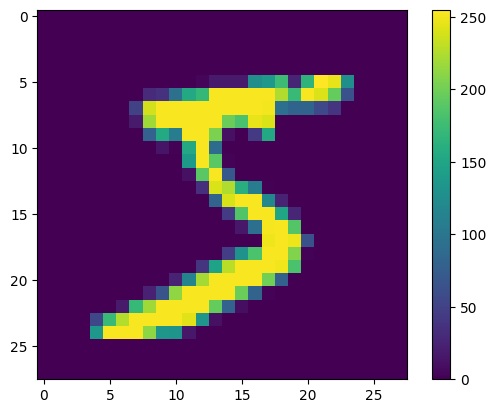

In [ ]:
# criando uma vizualização com os dados antes da normalização
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Para que a rede neural aprenda mais rápido, assim como fizemos em alguns
# exemplos do scikit-learn, é necessário normalizar a imagem entre valores de [0, 1]

print(f"exemplo de dado antes do procesamento: {train_images[0, 5, :]}")

train_images = train_images / 255.0

test_images = test_images / 255.0

print(f"exemplo de dado após o procesamento: {train_images[0, 5, :]}")

exemplo de dado antes do procesamento: [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]
exemplo de dado após o procesamento: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01176471 0.07058824 0.07058824 0.07058824 0.49411765 0.53333333
 0.68627451 0.10196078 0.65098039 1.         0.96862745 0.49803922
 0.         0.         0.         0.        ]


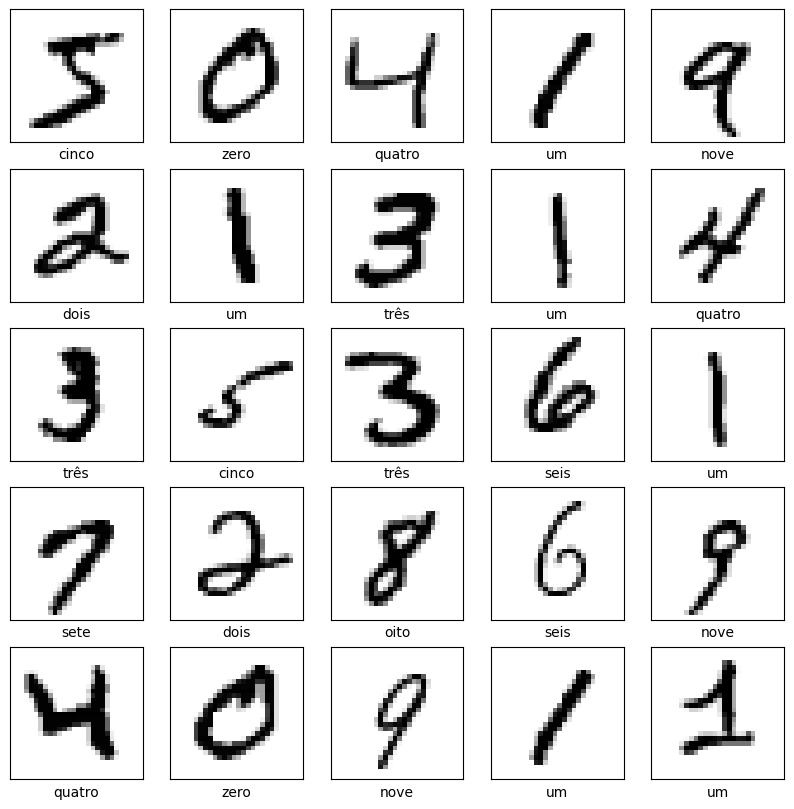

In [ ]:
# criando uma vizualização dos 25 primeiros exemplos contidos no dataset
# porém agora na escala de cinza, com cores de 0 a 1

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])   # retira as marcações de x e y
    plt.yticks([])
    plt.grid(False)  # retira as linhas do grid
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])   # adiciona os nomes das classes (nomes dos digitos)
plt.show()

## 3 - Construindo o Modelo Neural

Diferente dos modelos do scikit-learn, no keras é necessário definir um modelo a partir de componentes. Cada rede neural pode ter diferentes tipos de camadas de neurônios e difentes quantidades de neurônios por camada.




In [ ]:
# cria a variável modelo e atribui a ela uma rede neural

model = keras.Sequential([
    # essa camada transforma os dados do formato 28x28 para 784,1
    keras.layers.Flatten(input_shape=(28, 28)),

    # essa camada tem 128 neurônios
    keras.layers.Dense(128, activation='relu'),

    # essa tem 10 neurônios, é obrigatório manter 10 porque é exatamente o mesmo número de classes que existe
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# agora é necessário 'compilar' (fazer a rede se montar) o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4 - Treinamento do modelo

Até então os modelos e problemas que fizemos anteriormente no scikit-learn não demandaram excessivo processamento. Com redes neurais pode ser um pouco diferente, dependendo sobretudo da quantidade de dados e na quantidade de neurônios na arquitetura (quanto mais neurônios maior o tempo necessário).

In [ ]:
# treinamento o modelo (é o mesmo método utilizado no scikit-learn)
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8777 - loss: 0.4319
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9641 - loss: 0.1211
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9763 - loss: 0.0815
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9825 - loss: 0.0566
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0434
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9898 - loss: 0.0339
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9922 - loss: 0.0247
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9936 - loss: 0.0225
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9948 - loss: 0.0169
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9956 - loss: 0.0143


## 5 - Avaliação a partir da acurácia

O método utilizado para avaliar aqui será a acurácia

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f"Acurácia do conjunto de teste: {test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.9786 - loss: 0.0801
Acurácia do conjunto de teste: 0.978600025177002


Para essa estrutura de rede o treinamento gera um bom nível de aprendizagem para esse dataset

## 6 - Fazendo predições, a melhor parte!

Nesta sequência de códigos o objetivo é criar duas funções:
1. plotar e comparar uma imagem (X) e sua classe (y) dados pelo modelo já previamente treinados
2. plotar uma sequência de imagens mostram o valor predito e a imagem do valor real (X)

Observem que as barras em azul são valores corretos e em vermelho valores incorretos. Tente ler e entender o que ocorre em cada conjunto de códigos a seguir

In [ ]:
# comando para predizer
predictions = model.predict(test_images)

print(f"predições de exemplo: {predictions[0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
predições de exemplo: [2.5861725e-08 2.1745680e-11 7.1262157e-08 1.3296940e-05 1.4064101e-12
 1.2888970e-12 1.3095988e-12 9.9998587e-01 1.4784186e-08 5.2735663e-07]


O código anterior mostra que a saída predita tem 10 valores, a posição com o maior valor indica o que o modelo acredita ser o valor de entrada de (X). Neste caso, para o valor de teste, ele acredita que seja o índice 7 (corresponde ao dígito 8), pois é índice com maior saída.

In [ ]:
# checando o índice de maior valor
np.argmax(predictions[0])

7

In [ ]:
# resultado real diz que ele acertou
test_labels[0]

7

Agora são definidas duas funções para melhor enxergar o resultado.

In [ ]:
# função para plotar a imagem
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# função para plotar um gráfico em barras com os valores preditos (saída y do modelo)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


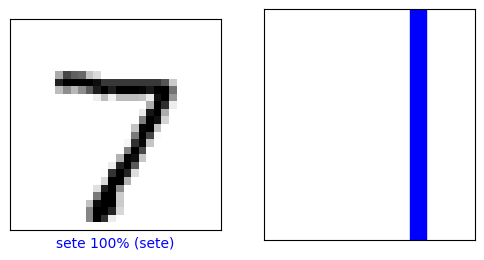

In [ ]:
# usando o código anterior para um exemplo
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

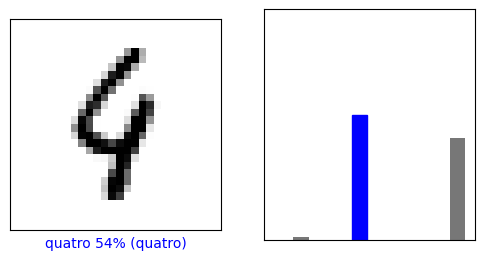

In [ ]:
# um segundo exemplo impreciso
i = 115
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

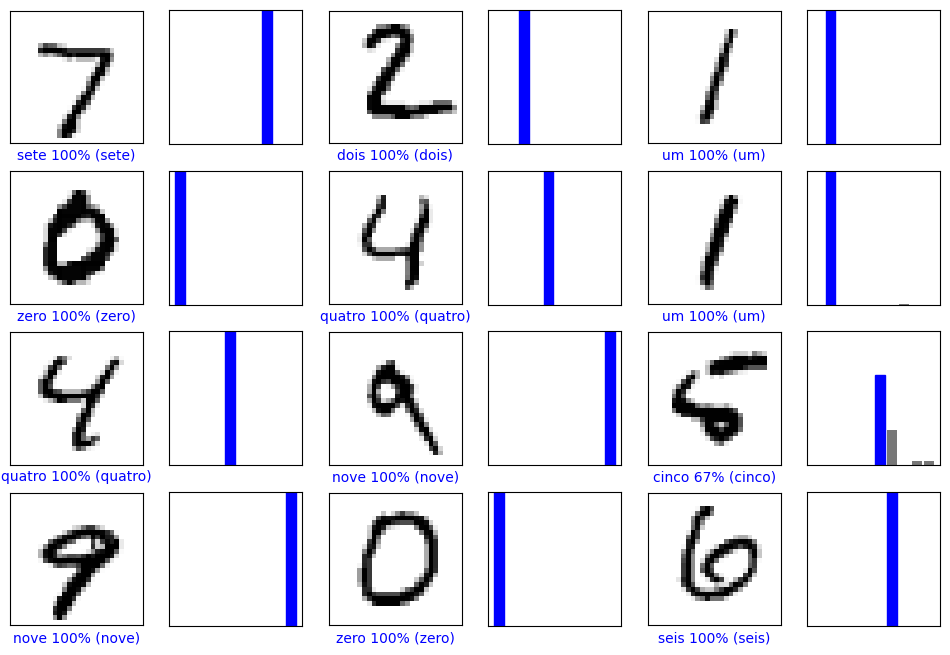

In [ ]:
# um exemplo com mais plots de uma só vez
# predições corretas em azul e as incorretas de vermelho

num_rows = 4
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

## Útima etapa: Alterar o código para funcionar com o dataset Fashion MINST

Como etapa de trabalho, vocês precisarão alterar o código para funcionar com o Fashion MINST. O código a seguir pode auxiliar para baixar o dataset.

```
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
```

lembrem-se de criar a variável auxiliar para nomear as classes:

```
class_names = ['camiseta/top', 'calça', 'suéter', 'vestido', 'casaco', sandália', 'camisa', 'tênis', 'bola', 'bota']
```

Experimentem mudar os valores de neurônios na primeira camada Densa, mudando o valor de 128 para 10, 20, 60 e 300 e veja o que acontece ao resultado do modelo.



```
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),  <== NESSA LINHA  [altere o 128 para valores como: 10 ou 20 ou 60 ou 300
    keras.layers.Dense(10, activation='softmax')
])

```

**Carregamento do Datashet Fashion MNIST**

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Visualização dos dados**

In [ ]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [ ]:
# variavel auxiliar
class_names = ['camiseta/top', 'calça', 'suéter', 'vestido', 'casaco', 'sandália', 'camisa', 'tênis', 'bola', 'bota']

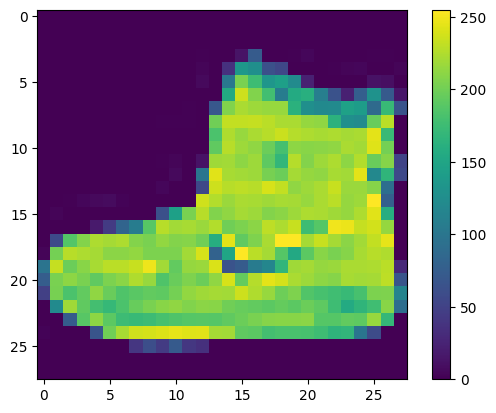

In [ ]:
# criando uma vizualização com os dados antes da normalização
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [ ]:
train_images.shape

(60000, 28, 28)

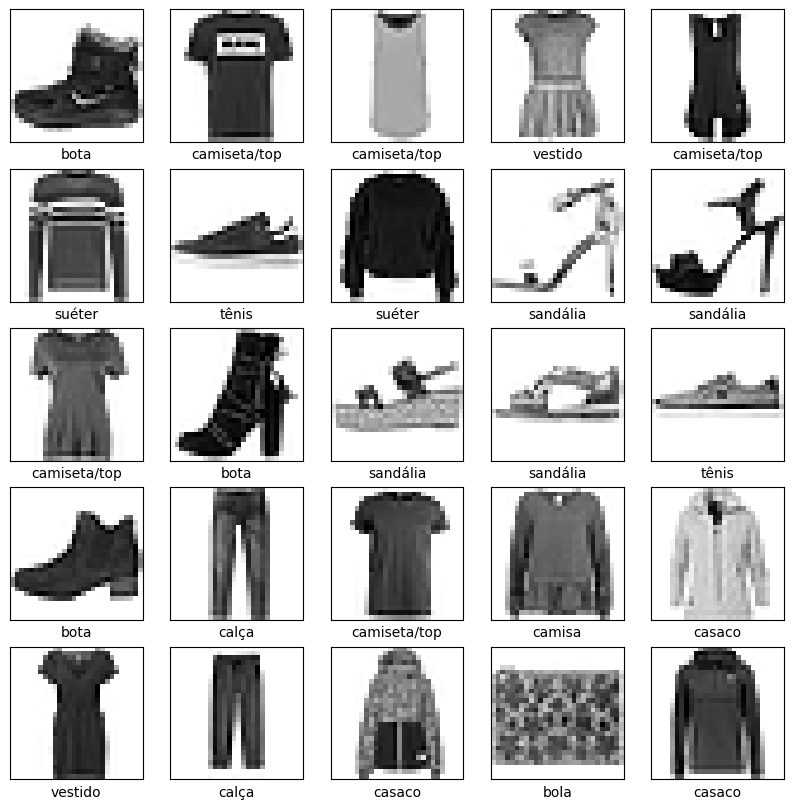

In [ ]:
# criando uma vizualização dos 25 primeiros exemplos contidos no dataset
# porém agora na escala de cinza, com cores de 0 a 1
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])   # retira as marcações de x e y
    plt.yticks([])
    plt.grid(False)  # retira as linhas do grid
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])   # adiciona os nomes das classes (nomes dos digitos)
plt.show()



**Camada da Rede Neural**

In [ ]:
# cria a variável modelo e atribui a ela uma rede neural
model = keras.Sequential([
    # essa camada transforma os dados do formato 28x28 para 784,1
    keras.layers.Flatten(input_shape=(28, 28)),
    # essa camada tem 128 neurônios
    keras.layers.Dense(128, activation='relu'),  # NESSA LINHA  [altere o 128 para valores como: 10 ou 20 ou 60 ou 300
    # essa tem 10 neurônios, é obrigatório manter 10 porque é exatamente o mesmo número de classes que existe
    keras.layers.Dense(10, activation='softmax')
])

**Gerar Modelo**

In [ ]:
# agora é necessário 'compilar' (fazer a rede se montar) o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treinar o modelo**

In [ ]:
# treinamento o modelo (é o mesmo método utilizado no scikit-learn)
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7812 - loss: 0.6286
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8632 - loss: 0.3840
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8741 - loss: 0.3404
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8834 - loss: 0.3105
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8919 - loss: 0.2959
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8992 - loss: 0.2719
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8991 - loss: 0.2662
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9050 - loss: 0.2544
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9087 - loss: 0.2444
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9109 - loss: 0.2399




**Resultado de acurácia**

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(f"Acurácia do conjunto de teste: {test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.8639 - loss: 0.3816
Acurácia do conjunto de teste: 0.8639000058174133


**Fazendo a Predição**

In [ ]:
# comando para predizer
predictions = model.predict(test_images)

print(f"predições de exemplo: {predictions[0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
predições de exemplo: [3.3457686e-09 2.8370195e-10 2.4807278e-08 3.7687666e-08 1.1743912e-07
 3.5372127e-03 4.0621089e-07 9.8876692e-02 2.8809310e-07 8.9758509e-01]


In [ ]:
# checando o índice de maior valor
np.argmax(predictions[0])

9

In [ ]:
# função para plotar a imagem
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# função para plotar um gráfico em barras com os valores preditos (saída y do modelo)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


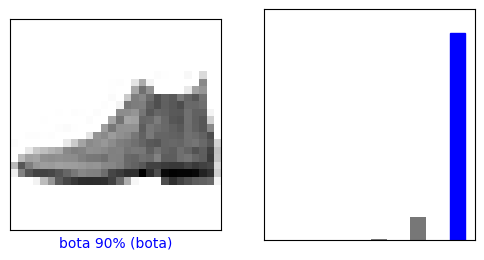

In [ ]:
# usando o código anterior para um exemplo
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

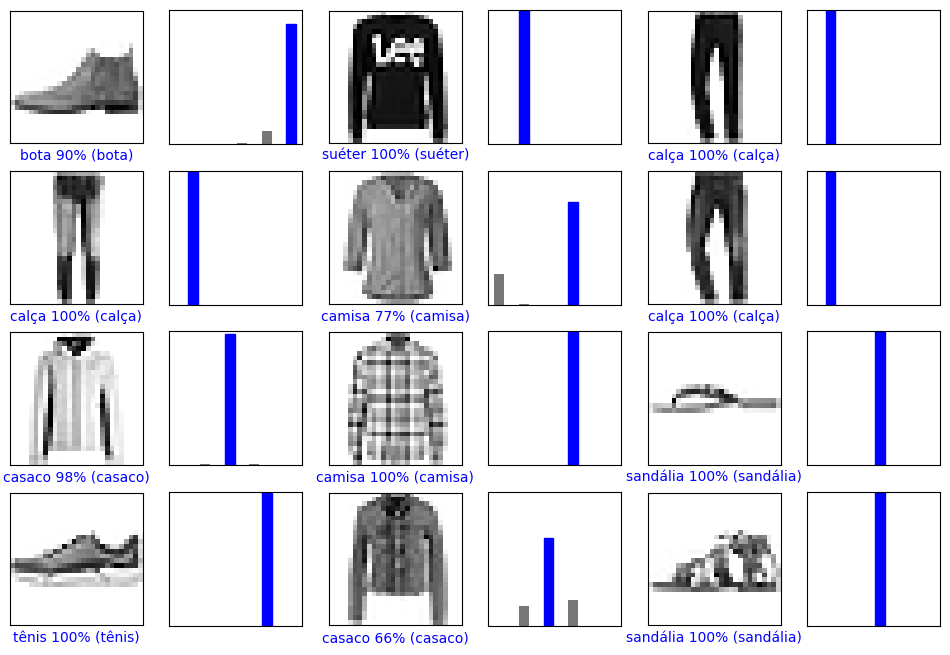

In [ ]:
# um exemplo com mais plots de uma só vez
# predições corretas em azul e as incorretas de vermelho

num_rows = 4
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

